In [1]:
import json, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [3]:
baseline = {
    "date": "2023-12-23",
    "model": "mistral-7b-instruct-v0.2.Q6_K",
    "version": "baseline",
    "temperature": 0.0,
    "aware_acc": 0.7065868263473054,
    "aware_rho": 0.46095769289667354,
    "agnostic_acc": 0.6492985971943888, 
    "agnostic_rho": 0.3801408906585249,
    "avg_acc": 0.6779427117708471,
    "avg_rho": 0.42054929177759925
}

In [47]:
records = json.load(open('validation_runs.json', 'r'))
df = pd.DataFrame.from_records(records)
df.loc[len(df.index)] = baseline
df_for_table = df[[ 'date', 'version', 'model', 'temperature', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]]
styled_df = df_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', 'avg_acc', 'avg_rho'])
styled_df

,date,version,model,temperature,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
0,2024-01-09,v1,gpt-3.5-turbo,0.700000,0.725451,0.549040,0.712575,0.541777,0.719013,0.545408
1,2024-01-12,v3,gpt-4,1.200000,0.821643,0.722481,0.782435,0.627895,0.802039,0.675188
2,2024-01-11,v3,gpt-3.5-turbo,1.200000,0.735471,0.600531,0.722555,0.516681,0.729013,0.558606
3,2024-01-13,v3,gpt-3.5-turbo,1.500000,0.717435,0.541716,0.708583,0.534737,0.713009,0.538226
4,2024-01-11,v2,gpt-3.5-turbo,0.200000,0.711423,0.488756,0.742515,0.528502,0.726969,0.508629
5,2024-01-13,v3-persona,gpt-3.5-turbo,1.200000,0.757515,0.612149,0.736527,0.592091,0.747021,0.602120
6,2024-01-11,v2,gpt-3.5-turbo,0.700000,0.701403,0.526440,0.742515,0.569994,0.721959,0.548217
7,2024-01-11,v1-conservative,gpt-3.5-turbo,0.700000,0.701403,0.540491,0.734531,0.568859,0.717967,0.554675
8,2024-01-09,v1,gpt-4,0.700000,0.801603,0.679521,0.762475,0.555941,0.782039,0.617731
9,2024-01-11,v3,gpt-3.5-turbo,0.700000,0.745491,0.584922,0.718563,0.508341,0.732027,0.546631


In [5]:
print(df_for_table.to_markdown())

|    | date       | version                            | model                         |   temperature |   agnostic_acc |   agnostic_rho |   aware_acc |   aware_rho |   avg_acc |   avg_rho |
|---:|:-----------|:-----------------------------------|:------------------------------|--------------:|---------------:|---------------:|------------:|------------:|----------:|----------:|
| 57 | 2023-12-23 | baseline                           | mistral-7b-instruct-v0.2.Q6_K |           0   |       0.649299 |       0.380141 |    0.706587 |    0.460958 |  0.677943 |  0.420549 |
|  8 | 2024-01-09 | v1                                 | gpt-4                         |           0.7 |       0.801603 |       0.679521 |    0.762475 |    0.555941 |  0.782039 |  0.617731 |
|  0 | 2024-01-09 | v1                                 | gpt-3.5-turbo                 |           0.7 |       0.725451 |       0.54904  |    0.712575 |    0.541777 |  0.719013 |  0.545408 |
| 14 | 2024-01-10 | v1-persona-examples      

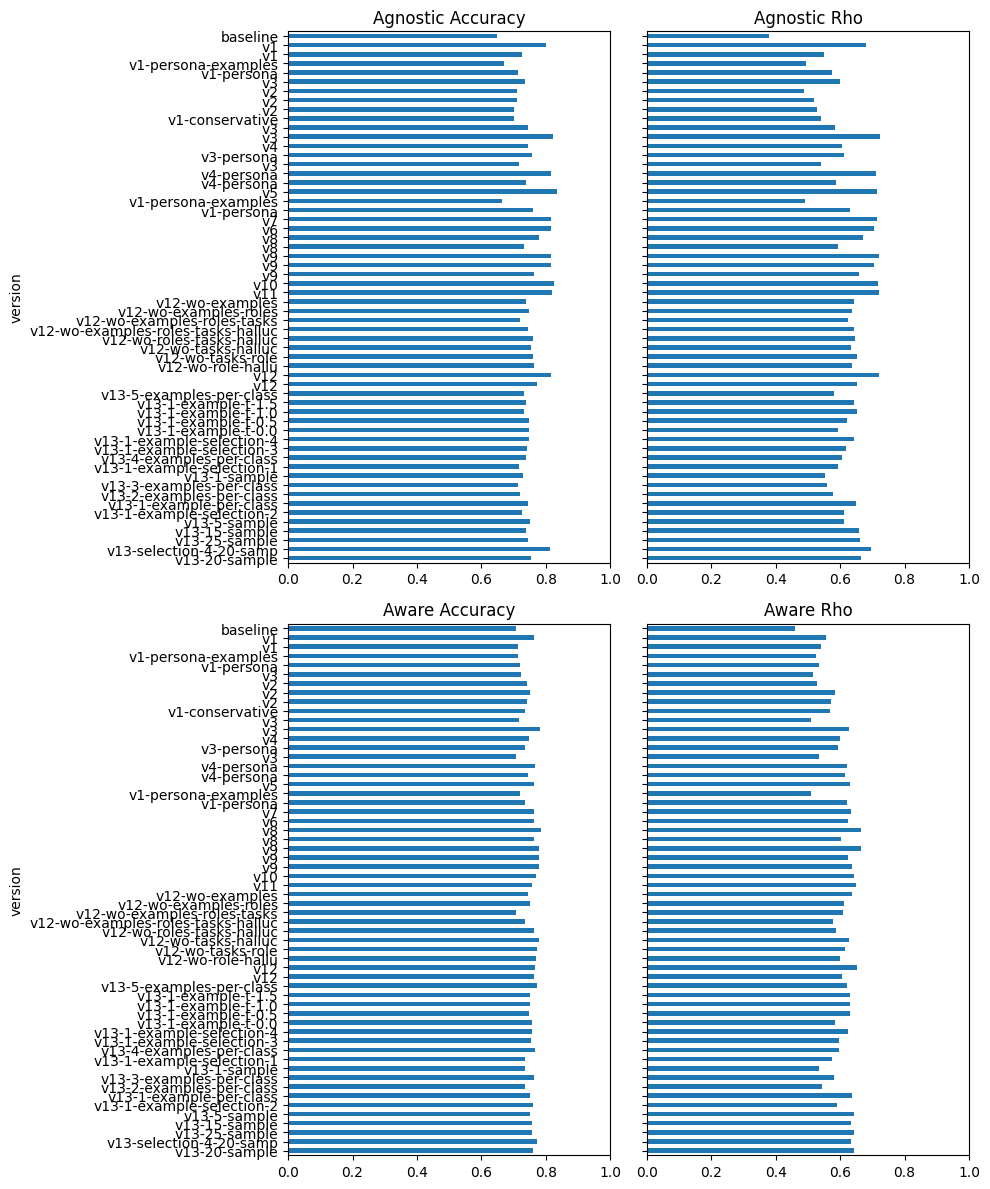

In [6]:
df_agnostic_acc = df[['version', 'date', 'agnostic_acc']].sort_values(by='date', ascending=False)
df_agnostic_rho = df[['version', 'date', 'agnostic_rho']].sort_values(by='date', ascending=False)
df_aware_acc = df[['version', 'date', 'aware_acc']].sort_values(by='date', ascending=False)
df_aware_rho = df[['version', 'date', 'aware_rho']].sort_values(by='date', ascending=False)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 12))

# Plotting each DataFrame on a specific subplot
df_agnostic_acc.plot(kind='barh', x='version', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Agnostic Accuracy')
axs[0, 0].set_xlim(0, 1)

df_agnostic_rho.plot(kind='barh', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Agnostic Rho')
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlim(0, 1)

df_aware_acc.plot(kind='barh', x='version', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Aware Accuracy')
axs[1, 0].set_xlim(0, 1)

df_aware_rho.plot(kind='barh', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Aware Rho')
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
df2 = df.query('date >= "2024-01-27"')
df2

,version,model,date,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho,val.model-aware,val.model-agnostic
38,v13-1-example-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.752495,0.636934,0.743487,0.650136,0.747991,0.643535,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
39,v13-2-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.734531,0.544549,0.721443,0.576513,0.727987,0.560531,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
40,v13-3-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.764471,0.581092,0.715431,0.558950,0.739951,0.570021,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
41,v13-4-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.766467,0.594896,0.737475,0.605604,0.751971,0.600250,"[{'label': 'Not Hallucination', 'p(Hallucinati...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
42,v13-5-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.774451,0.622071,0.733467,0.582187,0.753959,0.602129,"[{'label': 'Not Hallucination', 'p(Hallucinati...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
43,v13-1-example-selection-1,gpt-3.5-turbo,2024-01-27,1.2,0.734531,0.573175,0.717435,0.591981,0.725983,0.582578,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
44,v13-1-example-selection-2,gpt-3.5-turbo,2024-01-27,1.2,0.760479,0.590506,0.727455,0.613157,0.743967,0.601831,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
45,v13-1-example-selection-3,gpt-3.5-turbo,2024-01-27,1.2,0.754491,0.597350,0.741483,0.618108,0.747987,0.607729,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
46,v13-1-example-selection-4,gpt-3.5-turbo,2024-01-27,1.2,0.756487,0.623895,0.747495,0.642322,0.751991,0.633108,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
47,v13-1-example-t-0.0,gpt-3.5-turbo,2024-01-27,0.0,0.758483,0.583016,0.749499,0.592470,0.753991,0.587743,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."


In [8]:
df2.describe()

,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.105263,0.755016,0.608794,0.741272,0.620604,0.748144,0.614699
std,0.323992,0.011405,0.033622,0.020825,0.038998,0.013984,0.034497
min,0.000000,0.734531,0.533883,0.715431,0.552066,0.725983,0.542975
25%,1.200000,0.751497,0.586761,0.730461,0.592225,0.742474,0.593996
50%,1.200000,0.756487,0.623895,0.739479,0.618108,0.747991,0.626201
75%,1.200000,0.760479,0.633525,0.747495,0.650445,0.751995,0.642301
max,1.500000,0.774451,0.643323,0.813627,0.696634,0.793041,0.665704


In [9]:
df3 = df2[[ 'version', 'model', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].round(3)
df3

,version,model,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
38,v13-1-example-per-class,gpt-3.5-turbo,0.743,0.650,0.752,0.637,0.748,0.644
39,v13-2-examples-per-class,gpt-3.5-turbo,0.721,0.577,0.735,0.545,0.728,0.561
40,v13-3-examples-per-class,gpt-3.5-turbo,0.715,0.559,0.764,0.581,0.740,0.570
41,v13-4-examples-per-class,gpt-3.5-turbo,0.737,0.606,0.766,0.595,0.752,0.600
42,v13-5-examples-per-class,gpt-3.5-turbo,0.733,0.582,0.774,0.622,0.754,0.602
43,v13-1-example-selection-1,gpt-3.5-turbo,0.717,0.592,0.735,0.573,0.726,0.583
44,v13-1-example-selection-2,gpt-3.5-turbo,0.727,0.613,0.760,0.591,0.744,0.602
45,v13-1-example-selection-3,gpt-3.5-turbo,0.741,0.618,0.754,0.597,0.748,0.608
46,v13-1-example-selection-4,gpt-3.5-turbo,0.747,0.642,0.756,0.624,0.752,0.633
47,v13-1-example-t-0.0,gpt-3.5-turbo,0.749,0.592,0.758,0.583,0.754,0.588


In [10]:
df3.loc[len(df.index)] = baseline
df3_for_table = df3.sort_values(by='avg_acc', ascending=False)
styled_df3 = df3_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho"])
styled_df3

,version,model,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
56,v13-selection-4-20-samp,gpt-4-0125-preview,0.814000,0.697000,0.772000,0.635000,0.793000,0.666000
54,v13-20-sample,gpt-3.5-turbo,0.754000,0.663000,0.760000,0.642000,0.757000,0.653000
42,v13-5-examples-per-class,gpt-3.5-turbo,0.733000,0.582000,0.774000,0.622000,0.754000,0.602000
47,v13-1-example-t-0.0,gpt-3.5-turbo,0.749000,0.592000,0.758000,0.583000,0.754000,0.588000
52,v13-5-sample,gpt-3.5-turbo,0.752000,0.611000,0.752000,0.643000,0.752000,0.627000
41,v13-4-examples-per-class,gpt-3.5-turbo,0.737000,0.606000,0.766000,0.595000,0.752000,0.600000
55,v13-25-sample,gpt-3.5-turbo,0.745000,0.662000,0.758000,0.643000,0.752000,0.652000
46,v13-1-example-selection-4,gpt-3.5-turbo,0.747000,0.642000,0.756000,0.624000,0.752000,0.633000
38,v13-1-example-per-class,gpt-3.5-turbo,0.743000,0.650000,0.752000,0.637000,0.748000,0.644000
53,v13-15-sample,gpt-3.5-turbo,0.737000,0.658000,0.758000,0.632000,0.748000,0.645000


In [11]:
print(df3.to_latex(index=False))

\begin{tabular}{llrrrrrr}
\toprule
version & model & agnostic_acc & agnostic_rho & aware_acc & aware_rho & avg_acc & avg_rho \\
\midrule
v13-1-example-per-class & gpt-3.5-turbo & 0.743000 & 0.650000 & 0.752000 & 0.637000 & 0.748000 & 0.644000 \\
v13-2-examples-per-class & gpt-3.5-turbo & 0.721000 & 0.577000 & 0.735000 & 0.545000 & 0.728000 & 0.561000 \\
v13-3-examples-per-class & gpt-3.5-turbo & 0.715000 & 0.559000 & 0.764000 & 0.581000 & 0.740000 & 0.570000 \\
v13-4-examples-per-class & gpt-3.5-turbo & 0.737000 & 0.606000 & 0.766000 & 0.595000 & 0.752000 & 0.600000 \\
v13-5-examples-per-class & gpt-3.5-turbo & 0.733000 & 0.582000 & 0.774000 & 0.622000 & 0.754000 & 0.602000 \\
v13-1-example-selection-1 & gpt-3.5-turbo & 0.717000 & 0.592000 & 0.735000 & 0.573000 & 0.726000 & 0.583000 \\
v13-1-example-selection-2 & gpt-3.5-turbo & 0.727000 & 0.613000 & 0.760000 & 0.591000 & 0.744000 & 0.602000 \\
v13-1-example-selection-3 & gpt-3.5-turbo & 0.741000 & 0.618000 & 0.754000 & 0.597000 & 0.74

In [41]:
df_temp = df[df['version'].str.contains("-t-\d\.\d")]
pattern = r'-(\d\.\d)'  # This pattern extracts float
df_temp['temperature'] = df_temp['version'].str.extract(pattern)
df_temp['temperature'] = pd.to_numeric(df_temp['temperature'])
dft = df_temp.sort_values(by='temperature')
dft[["temperature", "aware_acc", "aware_rho", "agnostic_acc", "agnostic_rho"]]

/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/2217754181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['temperature'] = df_temp['version'].str.extract(pattern)
/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/2217754181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['temperature'] = pd.to_numeric(df_temp['temperature'])


,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho
47,0.0,0.758483,0.583016,0.749499,0.592470
48,0.5,0.748503,0.630003,0.747495,0.622400
49,1.0,0.750499,0.631378,0.731463,0.650755
50,1.5,0.752495,0.629167,0.739479,0.644336


In [40]:
df_examples = df[df['version'].str.contains("per-class")]
df_examples.loc[len(df_examples.index)] = df.loc[29]
pattern = r'-(\d)-'  # This pattern extracts digits
df_examples['n_examples'] = df_examples['version'].str.extract(pattern)
df_examples['n_examples'] = pd.to_numeric(df_examples['n_examples'])
df_examples.loc[5, 'n_examples'] = 0.0
dfx = df_examples.sort_values(by='n_examples')
dfx[["n_examples", "aware_acc", "aware_rho", "agnostic_acc", "agnostic_rho"]]

/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/1036060492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples.loc[len(df_examples.index)] = df.loc[29]
/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/1036060492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['n_examples'] = df_examples['version'].str.extract(pattern)
/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/1036060492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,n_examples,aware_acc,aware_rho,agnostic_acc,agnostic_rho
5,0.0,0.744511,0.636529,0.739479,0.642820
38,1.0,0.752495,0.636934,0.743487,0.650136
39,2.0,0.734531,0.544549,0.721443,0.576513
40,3.0,0.764471,0.581092,0.715431,0.558950
41,4.0,0.766467,0.594896,0.737475,0.605604
42,5.0,0.774451,0.622071,0.733467,0.582187


In [39]:
df_samples = df[df['version'].str.contains("sample")]
pattern = r'v13-(\d+)-sample'  # This pattern extracts digits
df_samples['samples'] = df_samples['version'].str.extract(pattern)
df_samples['samples'] = pd.to_numeric(df_samples['samples'])
dfs = df_samples.sort_values(by='samples')
dfs[["version", "samples", "aware_acc", "aware_rho", "agnostic_acc", "agnostic_rho"]]

/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/2658739867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samples['samples'] = df_samples['version'].str.extract(pattern)
/var/folders/s9/43kxx_s54pv352d0mqcwn5640000gn/T/ipykernel_59197/2658739867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samples['samples'] = pd.to_numeric(df_samples['samples'])


,version,samples,aware_acc,aware_rho,agnostic_acc,agnostic_rho
51,v13-1-sample,1,0.734531,0.533883,0.729459,0.552066
52,v13-5-sample,5,0.752495,0.643323,0.751503,0.611348
53,v13-15-sample,15,0.758483,0.632276,0.737475,0.657536
54,v13-20-sample,20,0.760479,0.641826,0.753507,0.663294
55,v13-25-sample,25,0.758483,0.642977,0.745491,0.661679


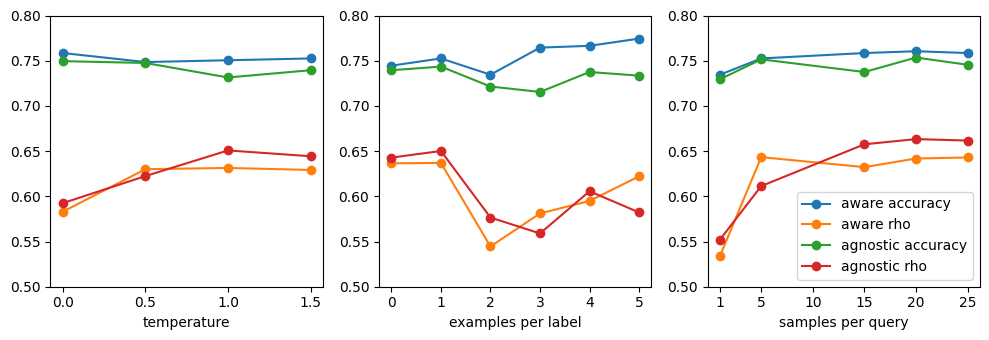

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

axes[0].plot(dft['temperature'], dft['aware_acc'], label='aware accuracy', marker='o')
axes[0].plot(dft['temperature'], dft['aware_rho'], label='aware rho', marker='o')
axes[0].plot(dft['temperature'], dft['agnostic_acc'], label='agnostic accuracy', marker='o')
axes[0].plot(dft['temperature'], dft['agnostic_rho'], label='agnostic rho', marker='o')
# axes[0].plot(dft['temperature'], dft['avg_acc'], label='accuracy', marker='o')
# axes[0].plot(dft['temperature'], dft['avg_rho'], label='rho', marker='o')
axes[0].set_ylim(0.5, 0.8)  # Setting y-axis range from 0.0 to 1.0
axes[0].set_xticks([0.0,0.5,1.0,1.5])
axes[0].set_xlabel('temperature')  # x-axis label

axes[1].plot(dfx['n_examples'], dfx['aware_acc'], label='aware accuracy', marker='o')
axes[1].plot(dfx['n_examples'], dfx['aware_rho'], label='aware rho', marker='o')
axes[1].plot(dfx['n_examples'], dfx['agnostic_acc'], label='agnostic accuracy', marker='o')
axes[1].plot(dfx['n_examples'], dfx['agnostic_rho'], label='agnostic rho', marker='o')
# axes[1].plot(dfx['n_examples'], dfx['avg_acc'], label='accuracy', marker='o')
# axes[1].plot(dfx['n_examples'], dfx['avg_rho'], label='rho', marker='o')
axes[1].set_ylim(0.5, 0.8)  # Setting y-axis range from 0.0 to 1.0
axes[1].set_xlabel('examples per label')  # x-axis label

axes[2].plot(dfs['samples'], dfs['aware_acc'], label='aware accuracy', marker='o')
axes[2].plot(dfs['samples'], dfs['aware_rho'], label='aware rho', marker='o')
axes[2].plot(dfs['samples'], dfs['agnostic_acc'], label='agnostic accuracy', marker='o')
axes[2].plot(dfs['samples'], dfs['agnostic_rho'], label='agnostic rho', marker='o')
# axes[2].plot(dfs['samples'], dfs['avg_acc'], label='accuracy', marker='o')
# axes[2].plot(dfs['samples'], dfs['avg_rho'], label='rho', marker='o')
axes[2].set_ylim(0.5, 0.8)  # Setting y-axis range from 0.0 to 1.0
axes[2].set_xlabel('samples per query')  # x-axis label
axes[2].set_xticks([1,5,10,15,20,25])
axes[2].legend()  # Adding a legend to differentiate the lines

# Display the plot
plt.tight_layout()
plt.show()


In [55]:
df_ablations = pd.DataFrame(columns=[ 'date', 'version', 'model', 'temperature', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ])
for idx in [28,29,30,31,32]:
    df_ablations.loc[len(df_ablations.index)] = df.loc[idx]
dfa = df_ablations.round(3)
dfa

,date,version,model,temperature,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
0,2024-01-25,v12,gpt-3.5-turbo,1.2,0.773547,0.652249,0.764471,0.605591,0.769009,0.62892
1,2024-01-25,v12-wo-examples,gpt-3.5-turbo,1.2,0.739479,0.64282,0.744511,0.636529,0.741995,0.639674
2,2024-01-25,v12-wo-examples-roles,gpt-3.5-turbo,1.2,0.749499,0.636,0.750499,0.611229,0.749999,0.623614
3,2024-01-25,v12-wo-examples-roles-tasks,gpt-3.5-turbo,1.2,0.721443,0.625697,0.708583,0.608013,0.715013,0.616855
4,2024-01-25,v12-wo-examples-roles-tasks-halluc,gpt-3.5-turbo,1.2,0.745491,0.641905,0.736527,0.576088,0.741009,0.608996
